# Report

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**In the first part I have done analysis of actual data. I have taken raw data from https://corona.help/country/india and stored it in *Book.xlsx*. Below, I have performed analysis of that data by using NumPy, pandas, matplotlib.
In the latter part I have done data analysis of top 10 countries ranked based on total cases of covid. Then I have estimated total deaths in India due to covid.**

In [2]:
df=pd.read_excel('Book.xlsx')


In [3]:
df.drop([36,37,38,39],axis=0,inplace=True)
df.drop(['Recovered','Recovered_today','Critical','Tests'],axis=1,inplace=True)

***Descriptive statistics of the data:***

In [4]:
df.describe().astype(int)

# df.map(int)

,Infected,Infected_today,Deaths,Deaths_today,Active
count,36,36,36,36,36
mean,1241147,4,14742,0,1226405
std,1833966,11,27169,0,1808321
min,10747,0,4,0,10618
25%,105864,0,1120,0,104863
50%,612768,0,6542,0,606358
75%,1320806,5,14292,0,1311265
max,8136811,52,148418,1,7988393


**Note: Here I have mentioned states. But the data also involves Union Territories in India. So just to write in short, instead of writing States and Union Territories in India, I have just written states.**

In [5]:
states=df['State']
infected=df['Infected']

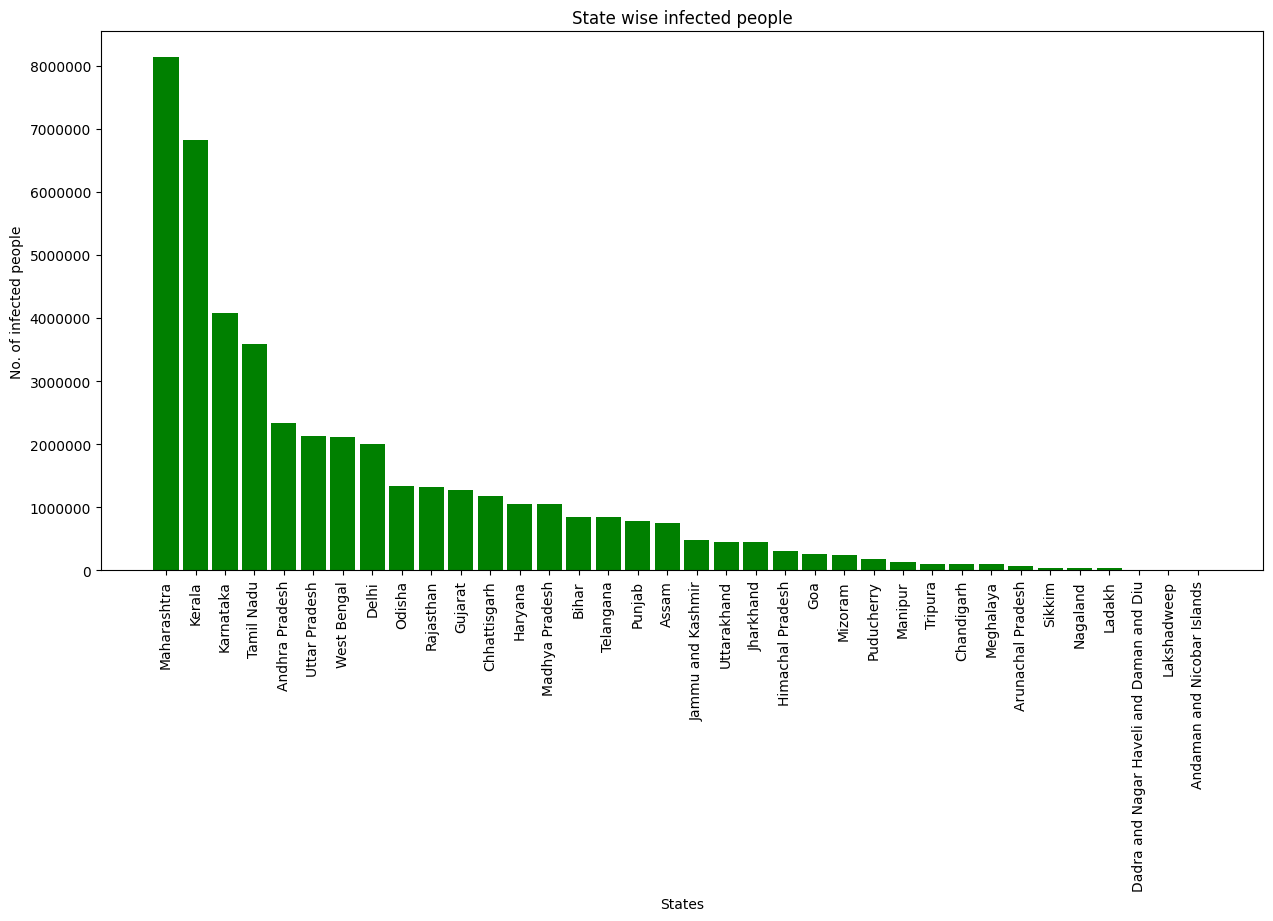

In [6]:
fig=plt.figure(figsize=(15,7))
plt.ticklabel_format(style='plain')
plt.xlabel('States')
plt.ylabel('No. of infected people')
plt.title('State wise infected people')
plt.bar(states,infected,width=0.85,color='green')
plt.xticks(states, rotation=90)
plt.show()

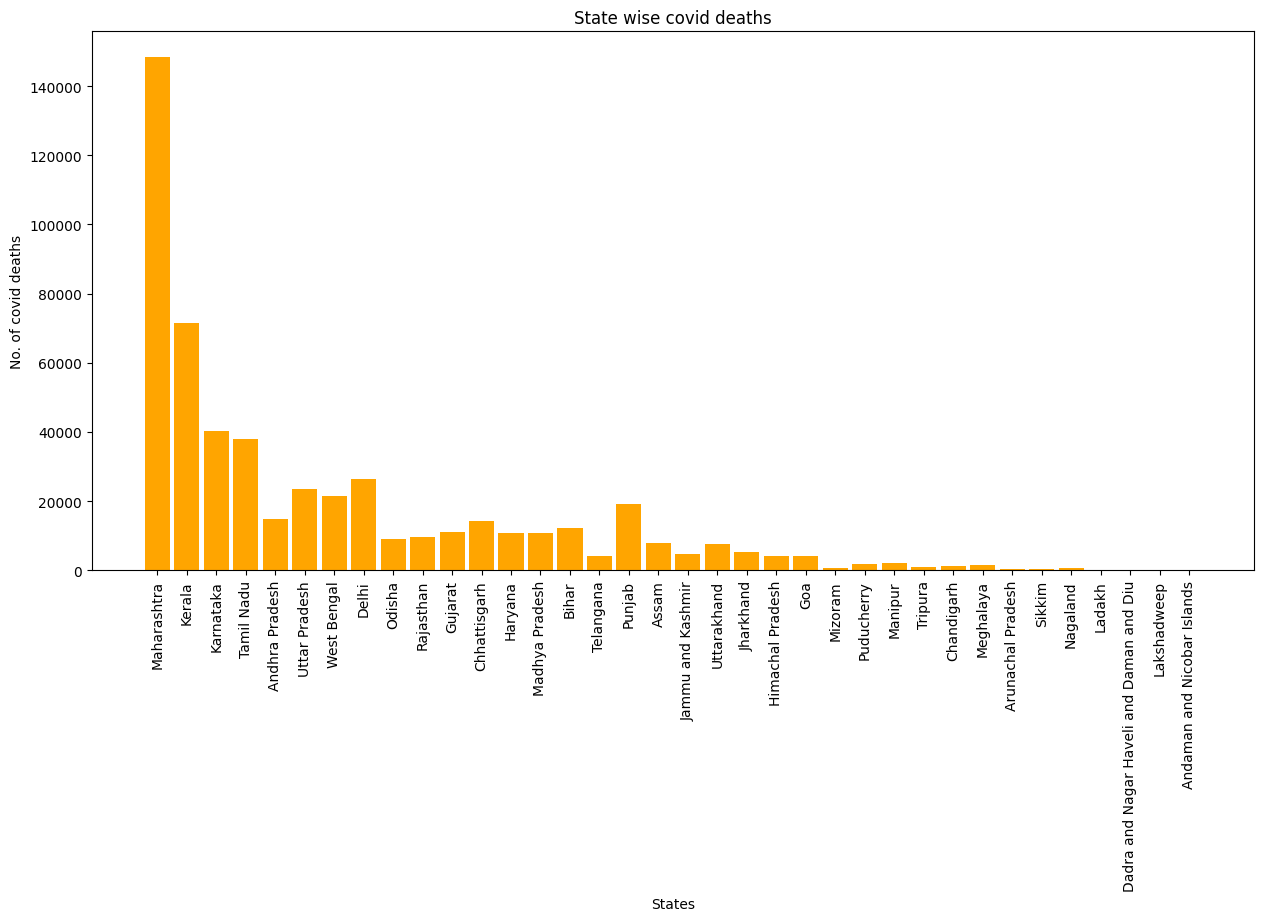

In [7]:
fig=plt.figure(figsize=(15,7))
plt.ticklabel_format(style='plain')
plt.xlabel('States')
plt.ylabel('No. of covid deaths')
plt.title('State wise covid deaths')
plt.bar(states,df['Deaths'],width=0.85,color='orange')
plt.xticks(states, rotation=90)
plt.show()

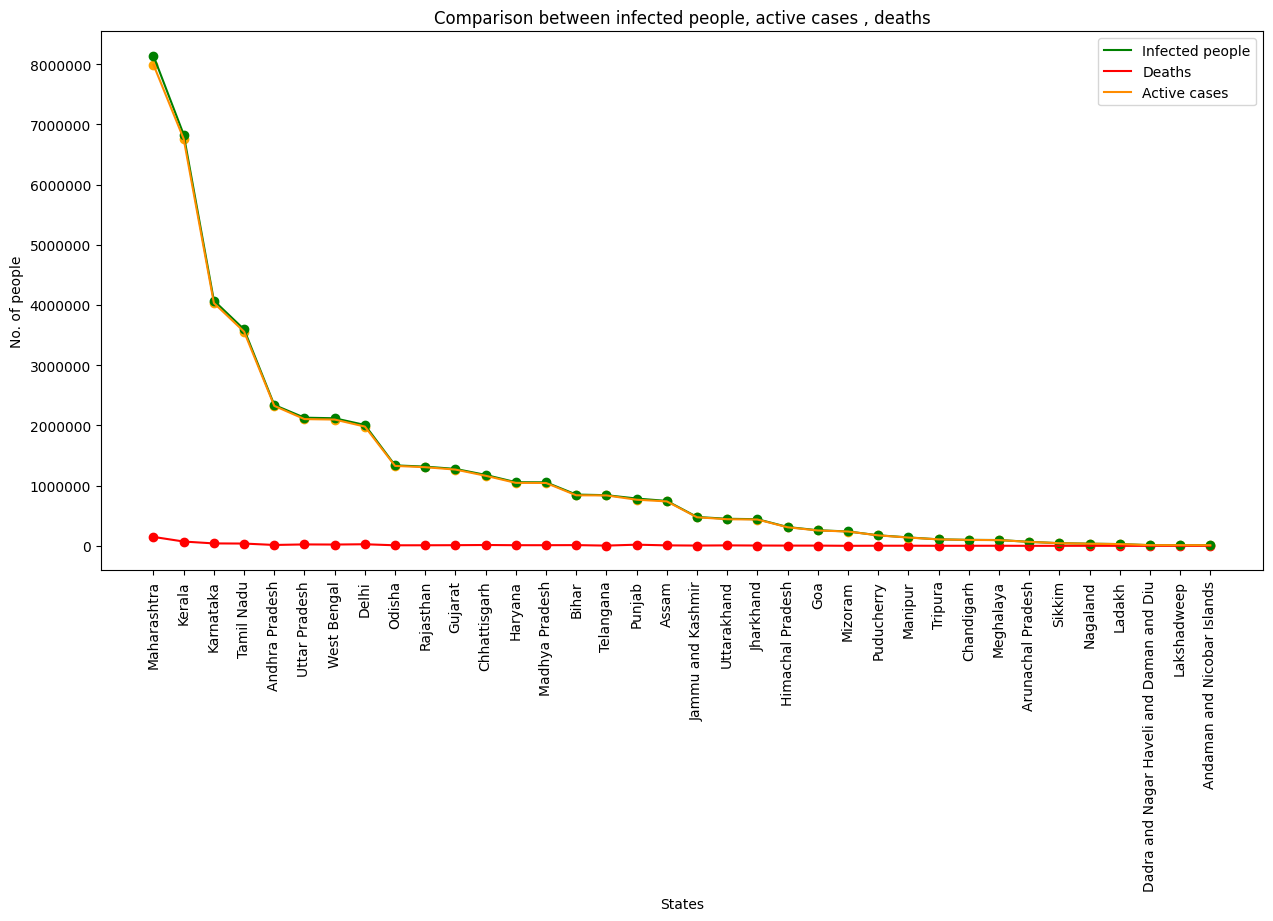

In [8]:
fig=plt.figure(figsize=(15,7))
plt.ticklabel_format(style='plain')
plt.plot(states,infected,color='green',label='Infected people')
plt.xticks(states, rotation=90)
plt.scatter(states,df['Deaths'],color='red')
plt.plot(states,df['Deaths'],color='red',label='Deaths')
plt.scatter(states,df['Active'],color='orange')
plt.plot(states,df['Active'],color='darkorange',label='Active cases')

plt.xticks(states, rotation=90)
plt.scatter(states,infected,color='green')
plt.legend()
plt.title('Comparison between infected people, active cases , deaths')
plt.xlabel('States')
plt.ylabel('No. of people')
plt.show()

In [9]:
infected=df['Infected'].sum().astype(int)
print('Total number of covid infected people:',end=" "),print(infected)
avginfected=df['Infected'].mean().astype(int)
print('Average number of infected people per state:',end=" "),print(avginfected)
print('Maximum number of covid infected people is:',end=" "),print(df['Infected'].max().astype(int))
print('And they are from',end=" "), print(df['State'][df['Infected'].argmax()]+'.')
print('Minimum number of covid infected people is:',end=" "),print(df['Infected'].min().astype(int))
print('And they are from',end=" "), print(df['State'][df['Infected'].argmin()]+'.')

Total number of covid infected people: 44681318
Average number of infected people per state: 1241147
Maximum number of covid infected people is: 8136811
And they are from Maharashtra.
Minimum number of covid infected people is: 10747
And they are from Andaman and Nicobar Islands.


(None, None)

In [10]:
deaths=df['Deaths'].sum().astype(int)
print('Total number of covid deaths:',end=" "),print(deaths)
avgdeaths=df['Deaths'].mean().astype(int)
print('Average number of deaths per state:',end=" "),print(avgdeaths)
print('Maximum number of covid deaths is:',end=" "),print(df['Deaths'].max().astype(int))
print('And they are from',end=" "), print(df['State'][df['Deaths'].argmax()]+'.')
print('Minimum number of covid deaths is:',end=" "),print(df['Deaths'].min().astype(int))
print('And they are from',end=" "), print(df['State'][df['Deaths'].argmin()]+'.')

Total number of covid deaths: 530721
Average number of deaths per state: 14742
Maximum number of covid deaths is: 148418
And they are from Maharashtra.
Minimum number of covid deaths is: 4
And they are from Dadra and Nagar Haveli and Daman and Diu.


(None, None)

# Total number of covid deaths in India: 530721

In [11]:
df=pd.read_excel('Top10data.xlsx')

In [12]:
df.drop(0,axis=0,inplace=True)


**Raw data taken from https://www.worldometers.info/coronavirus/ which includes data of top 10 countries ranked based on total cases:**

In [13]:
df.drop(df.columns[0],axis=1,inplace=True)
df['Total\nCases']=pd.to_numeric(df['Total\nCases'])
df['Total\nDeaths']=pd.to_numeric(df['Total\nDeaths'])
df['Population']=pd.to_numeric(df['Population'])


***Descriptive statistics of specific data:***

In [14]:
country=df['Country,\nOther']
deaths=df['Total\nDeaths']
cases=df['Total\nCases']
population=df['Population']
df[['Total\nCases','Total\nDeaths','Population']].describe().astype(int)

,Total\nCases,Total\nDeaths,Population
count,10,10,10
mean,36511977,311709,123667031
std,24498939,344298,89557107
min,17042722,32669,51329899
25%,24477518,116862,66312865
50%,30084312,174203,84722786
75%,37283993,345847,140750669
max,103123617,1121298,334805269


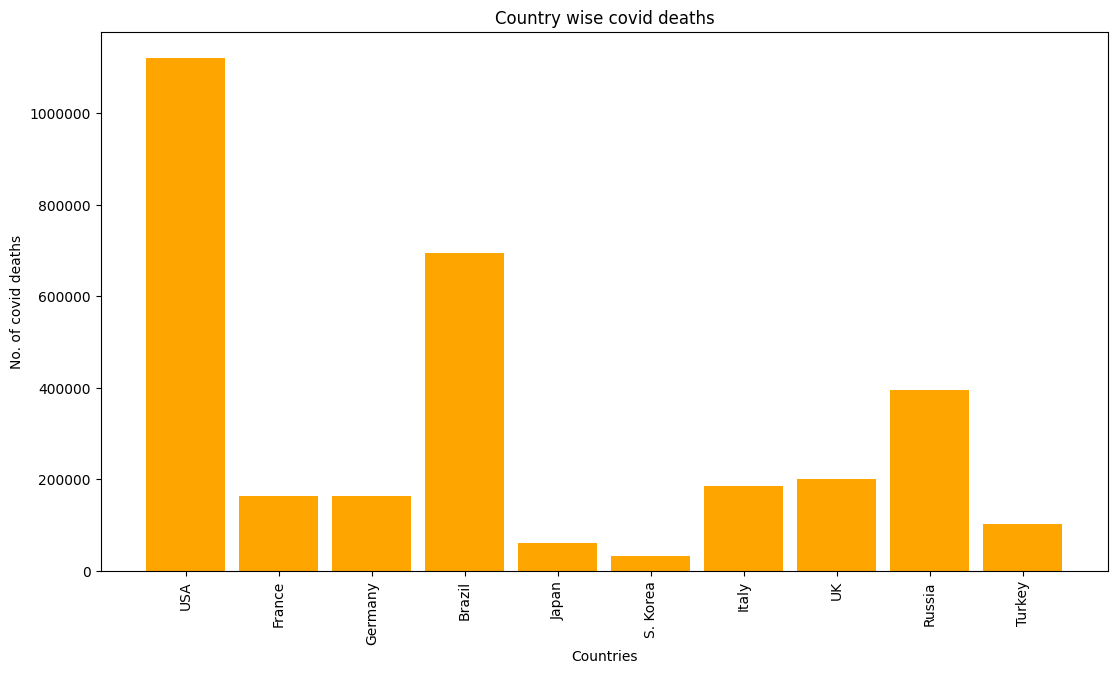

In [15]:
fig=plt.figure(figsize=(13,7))
plt.ticklabel_format(style='plain')
plt.xlabel('Countries')
plt.ylabel('No. of covid deaths')
plt.title('Country wise covid deaths')
plt.bar(country,deaths,width=0.85,color='orange')
plt.xticks(country, rotation=90)
plt.show()

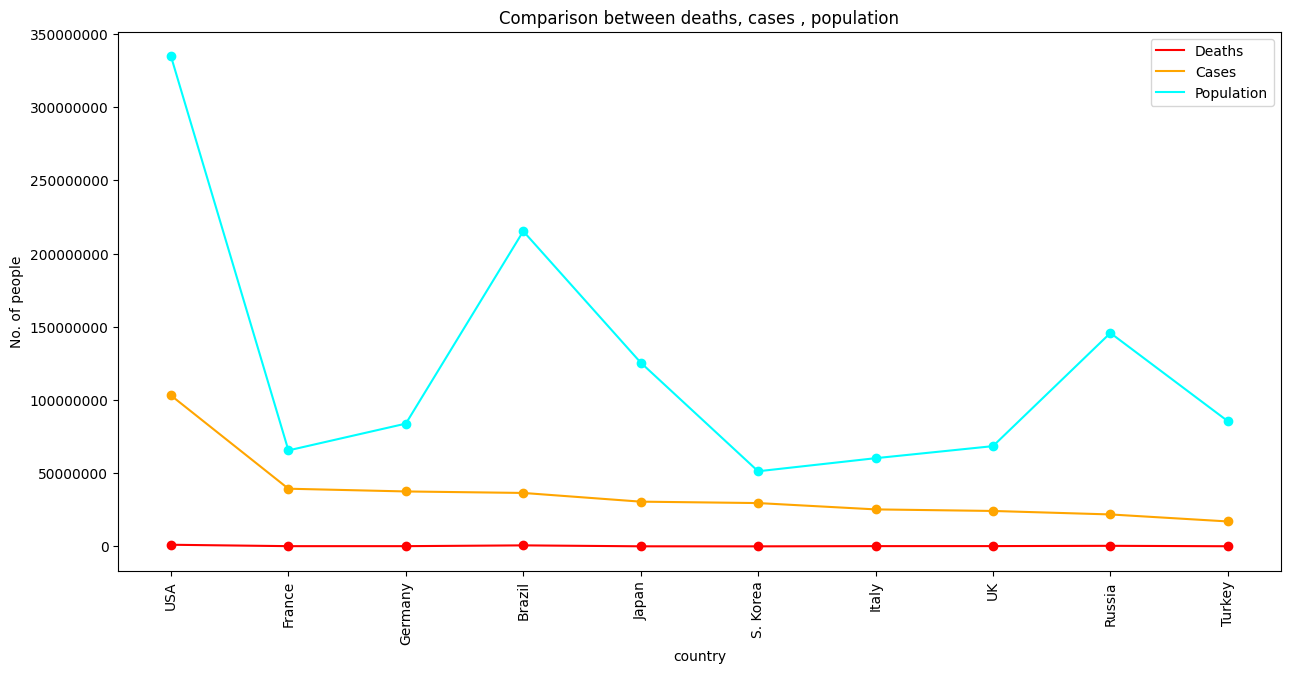

In [16]:

fig=plt.figure(figsize=(15,7))
plt.ticklabel_format(style='plain')
plt.plot(country,deaths,color='red',label='Deaths')
plt.xticks(country, rotation=90)
plt.scatter(country,deaths,color='red')
plt.plot(country,cases,color='orange',label='Cases')
plt.scatter(country,cases,color='orange')
plt.plot(country,population,color='cyan',label='Population')

plt.xticks(country, rotation=90)
plt.scatter(country,population,color='cyan')
plt.legend()
plt.title('Comparison between deaths, cases , population')
plt.xlabel('country')
plt.ylabel('No. of people')
plt.show()

In [17]:
deaths_per_lakh=[0,0,0,0,0,0,0,0,0,0,]


for i in range(11):
    if i!=0:
        deaths_per_lakh[i-1]=(deaths[i]/population[i])*100000


In [18]:
for i in range(10):
    deaths_per_lakh[i]=round(deaths_per_lakh[i])
    deaths_per_lakh[i]=int(deaths_per_lakh[i])

In [19]:
print('Number of deaths per lakh of the population:')
deaths_per_lakh

Number of deaths per lakh of the population:


[335, 249, 194, 323, 48, 64, 308, 293, 270, 119]

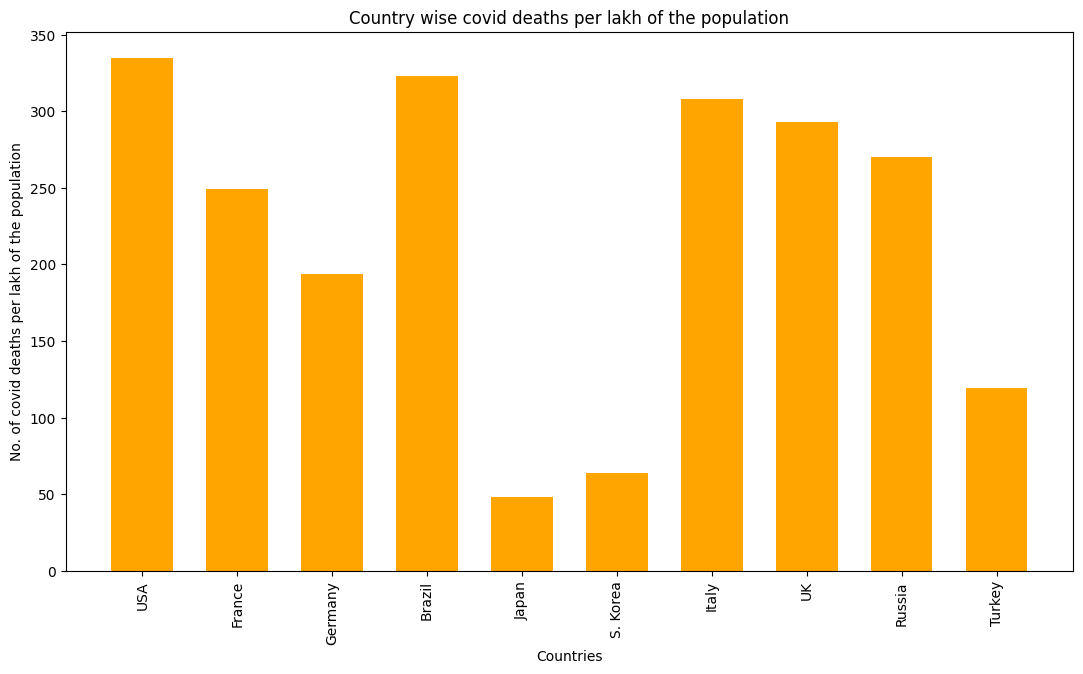

In [20]:
fig=plt.figure(figsize=(13,7))
plt.ticklabel_format(style='plain')
plt.xlabel('Countries')
plt.ylabel('No. of covid deaths per lakh of the population')
plt.title('Country wise covid deaths per lakh of the population')
plt.bar(country,deaths_per_lakh,width=0.65,color='orange')
plt.xticks(country, rotation=90)
plt.show()

**Average deaths per country per lakh of the population:**

In [21]:

avg_deaths=int(sum(deaths_per_lakh)/len(deaths_per_lakh))
avg_deaths

220

Population of India:1,406,631,776

In [22]:
popind=1406631776
tot_deaths=int(avg_deaths*(popind/100000))
print("Estimation of total deaths in India:",tot_deaths)

Estimation of total deaths in India: 3094589


#  Estimation of total deaths in India due to covid : 3094589

**I have taken raw data from  https://www.worldometers.info/coronavirus/. I feel this source is trustworthy because-**<br>
1.Worldometer manually analyzes, validates, and aggregates data from thousands of sources in real time and provides global COVID-19 live statistics for a wide audience of caring people around the world.<br>
2.Its data is also trusted and used by the UK Government, Johns Hopkins CSSE, the Government of Thailand, the Government of Vietnam, the Government of Pakistan, Financial Times, The New York Times, Business Insider, BBC, and many others. <br>
3.Over the past 15 years, their statistics have been requested by, and provided to Oxford University Press, Wiley, Pearson, CERN, World Wide Web Consortium (W3C), The Atlantic, BBC, Milton J. Rubenstein Museum of Science & Technology, Science Museum of Virginia, Morgan Stanley, IBM, Hewlett Packard, Dell, Kaspersky, PricewaterhouseCoopers, Amazon Alexa, Google Translate, the United Nations Conference on Sustainable Development (Rio+20), the U2 concert, and many others.<br>
4.Worldometer is cited as a source in over 10,000 published books and in more than 6,000 professional journal articles and was voted as one of the best free reference websites by the American Library Association (ALA), the oldest and largest library association in the world.


**Why have I used this method to estimate the number of covid deaths in India?** -<br>
1)I have taken data of **top 10 countries (excluding India)** ranked on the basis of number of total covid cases. According to the official data (including India) India is at the second position (after USA) in the world on the basis of total covid cases.<br>
2)India is the second most populated country in the world with a sixth of the world's population. According to official estimates, India's population stood at 1.38 billion. (source-https://en.wikipedia.org/wiki/Demographics_of_India).<br>
3)Hence, considering the huge number of cases and huge population of India, the total number of deaths might be greater than 530721 (which is the official figure).<br>
4)The countries in the raw data are located in different continents. That means, raw data includes the official data of different parts of the world.<br>
5)Many countries in the raw data are in the top 30 of ' Trustworthy countries' list ' in the world according to https://www.usnews.com/news/best-countries/rankings/trustworthy.<br>
6)Therefore, considering all the above points average number of covid deaths per lakh of population of these countries should be approximately equal to number of covid deaths per lakh of population of India.